# DSCI 100-004: Group 19 Project

Aadeesh Nargotra, Hongwei Wang, Joshua Tan, Nayeon Lee

## Table of Contents:
* [Introduction](#introduction)
    * [Background and significance](*background)
* [Methods: Cleaning and Exploring the Data](#methods)
    * [Installing and loading the required packages](#installing)
    * [Reading the airplane dataset](#reading)
    * [Reducing the size of the dataset](#reducing)
    * [Cleaning airplane_data](#cleaning)
    * [Splitting airplane_cleaned_data into training and test sets](#splitting)
* [Methods: Tuning and Evaluating the Classifier]
* [Methods: Predicting Satisfaction from the Test Set] 

## Introduction <a name="introduction"></a>

### Background and significance <a name="background"></a>

Airlines regularly receive feedback from customers who utilize their planes based on their experience. A major responsibility of airlines when it comes to providing amenities is to ensure that customers have the best possible experience while flying. By identifying areas for improvement, airlines would be able to better understand customer needs, thereby increasing customer retention. We will be answering our predictive question, “can we predict the next customer’s satisfaction as satisfied or dissatisfied based on the airplane satisfaction data?”  The factors that can determine our classification include, departure/arrival delays, gate location, online boarding, inflight entertainment, legroom service, check-in service, inflight wifi service, food and drink, seat comfort, on-board service baggage handling, and cleanliness. We will be utilizing ‘Airline Passenger Satisfaction’ dataset by T.J. Klein on Kagle. https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

<mark>TODO: Add information about what the dataset includes. (I.e., what each column has)<mark>

<mark>TODO: Perhaps add citations here?<mark>


## Methods <a name="methods"></a>

### Installing and loading the required packages <a name="installing"></a>

In [1]:
install.packages("janitor")
install.packages("kknn")
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(janitor)
library(tidymodels)
library(gridExtra)
library(kknn)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::fil

### Reading the airplane dataset <a name="reading"></a>

The airplane data that was downloaded from Kaggle was already split into a test and training set. Specifcially, the dataset was split such that 20% of the data was in the testing set and 80% was in the training set. 

In [3]:
test_set <- read_csv("Airplane Data/test.csv") 
train_set <- read_csv("Airplane Data/train.csv")

New names:
• `` -> `...1`
Rows: 25976 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Gender, Customer Type, Type of Travel, Class, satisfaction
dbl (20): ...1, id, Age, Flight Distance, Inflight wifi service, Departure/A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 103904 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Gender, Customer Type, Type of Travel, Class, satisfaction
dbl (20): ...1, id, Age, Flight Distance, Inflight wifi service, Departure/A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Reducing the size of the dataset <a name="reducing"></a>

As specified by the output after using `read_csv()` on both sets, the dataset is extremely large with 129,880 total observations and 25 columns. As such, our TA advised us to reduce the dataset into 1/5th of it's original size. To accomplish this, we combined the test and training datasets using `rbind()` and used the `slice()` function to only keep every 5th observation.

In [4]:
airplane_data <- rbind(test_set, train_set)
airplane_data <- airplane_data |>
              slice(seq(from = 1, to = 129880, by = 5))
nrow(airplane_data)

[1] 25976

Using `nrow()` confirms that our dataset now has 25976 observations compared to the 129,880 observations we previously had.

### Cleaning airplane_data <a name="cleaning"></a>

In [5]:
head(airplane_data)

...1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,⋯,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,⋯,5,5,5,5,2,5,5,50,44,satisfied
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,⋯,5,4,3,1,1,2,5,0,0,satisfied
10,47583,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,⋯,3,3,4,3,1,3,4,29,19,satisfied
15,22470,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,⋯,2,4,2,4,4,5,2,5,2,neutral or dissatisfied
20,63995,Male,Loyal Customer,60,Business travel,Business,612,4,4,⋯,5,5,5,5,5,5,5,21,49,satisfied
25,7823,Male,Loyal Customer,62,Personal Travel,Eco,710,3,5,⋯,2,3,5,5,4,4,2,0,0,neutral or dissatisfied


<font size= '2'> **Table 1:** Using `head()` on our reduced airplane dataset reveals information about the column names and their datatypes

Now that the data set is more manageable, we began cleaning our data to prepare for it for analysis. Upon using `head()`, we noticed that the columns weren't in a clean format. Thus, we used the `clean_names()` function to make the column names into snake_case.

Next, we needed to remove unnecessary columns that we knew we would not need for our knn analysis. Specifically, we removed the `...1` and `id` columns as they were arbitrary passenger identifiers. We also removed the `Gender`, `Customer Type`, `Age`, `Type of Travel`, and `Class` columns as they are not numerical and thus would not be used for the knn analysis. Finally, although being a numerical variable, we removed `Flight Distance` as we felt that it was not as relevant to a passenger's overall satisfaction. Indeed, the flight distance is a variable  that airlines cannot improve upon as it is simply out of their control.

We assigned all these changes to a new variable called `airplane_data_cleaned`.

In [6]:
airplane_data_cleaned <- airplane_data |>
              clean_names() |>
              select(9:25)

Additionally, as the data set was too big to visually see if there were any missing data (i.e., NAs), we used the `map_df()` function to create a summary table of any NA's in a given column.

In [7]:
map_df(airplane_data_cleaned, ~sum(is.na(.))) 

inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0


<font size= '2'> **Table 2:** A summary table of the number of missing data in each column.

The `map_df()` function revealed that there were 75 NA's in the `arrival_delay_in_minutes` column. Because there were only a few rows with missing data (i.e., 75 rows), we felt comfortable dropping them as they likely wouldn't affect our k-nn analysis. As such, we used the `drop_na` function to remove the rows with an NA in the `arrival_delay_in_minutes` column.

In [8]:
airplane_data_cleaned <- airplane_data_cleaned |> drop_na()
as_tibble(sum(is.na(airplane_data_cleaned))) |> 
    rename(total_na = value)
nrow(airplane_data_cleaned)

total_na
<int>
0


[1] 25901

<font size= '2'> **Table 3:** Using the `as_tibble` function in conjunction with`sum(is.na()` and `rename()` created a table of the total NA's in our dataset. As expected, there are now zero NA's in our data set. Additionally, `nrow()` reveals that our dataset has been reduced from 25976 rows to 25901 rows—consistent with the removal of the 75 rows with NA's.

Finally, given that we want to predict the `satisfaction` label of a given observation, we converted the `satisfacation` column from a character class to the factor datatype.

In [9]:
airplane_data_cleaned <- airplane_data_cleaned|> 
                      mutate(satisfaction = as_factor(satisfaction))
class(airplane_data_cleaned$satisfaction)

[1] "factor"

The `class` function confirms that the `satisfaction` column is now a factor datatype.

### Splitting airplane_cleaned_data into training and test sets <a name="splitting"></a>

Once the airplane data set was cleaned, we split it into our training and test sets using the `initial_split()` function. By setting the `strata` argument to `satisfaction`, we ensure that the data is stratified by the `satisfaction` variable. Furthermore, setting `prop = 0.75` ensures that 75% of the original data set ends up in the training set. In addition, `initial_split()` ensures that the proportions between observations that are either a) satisfied or b) neutral or dissatisfied are the same for both training and test sets. 

We assigned the training and test sets to `airplane_train` and `airplane_test`, respectively.

In [10]:
set.seed(1234)

airplane_split <- initial_split(airplane_data_cleaned, prop = 0.75, strata = satisfaction)
airplane_train <- training(airplane_split)
airplane_test <- testing(airplane_split)

### Exploring the training set

As part of the exploratory data analysis, we calculated the count and percentage of satisfied and netural or dissatisfied observations in the training set. To accomplish this, we used the `group_by()` function in conjunction with`summarize()`. 

In [11]:
num_obs <- nrow(airplane_train)
airplane_train |> 
    group_by(satisfaction) |>
    summarize(
            count = n(),
            percentage = n() / num_obs * 100
              )

satisfaction,count,percentage
<fct>,<int>,<dbl>
satisfied,8380,43.14028
neutral or dissatisfied,11045,56.85972


<font size= '2'> **Table 4:** The count and percentage of observations in the training set grouped by satisfaction.

The above table reveals that we have 8380 (~ 43.14%) observations that were classified as satisfied and 11045 (~ 56.86%) that were classified as neutral or dissatisfied. Indeed, it looks like there are slightly more passengers who are neutral or dissatisfied with their airline experience compared to passengers who are satisfied.

<mark>**TODO: Mention Balancing**<mark> 

Furthermore, we examined the means of each potential predictor variable. Aside from `departure_delay_in_minutes` and `arrival_delay_in_minutes`, each variable is discrete and includes each passenger's satisfaction level for a given airline service on a scale of 1-5. Thus, a higher mean would indicate that many passengers were highly satisfied with the service. This information helped with deciding which predictor variable to include in our knn analysis because if more people were satisfied with one service compared to another, that might play a larger role in whether they were classified as `satisfied` or `neutral or dissatisfied`.

To find the means , we used the `map_df()` function and `pivot_longer()` to reorganize the data to create a column for the variable name and another column with the variable's respective mean. We then used `arranged(desc(mean))` to arrange the dataframe by the mean.

In [12]:
airplane_means <- airplane_train |>
    select(-satisfaction) |>
    map_df(mean)   
airplane_means |>
    select(-departure_delay_in_minutes, -arrival_delay_in_minutes) |>
    pivot_longer(1:14, names_to = "variable", values_to = "mean") |>
    arrange(desc(mean))

variable,mean
<chr>,<dbl>
inflight_service,3.636036
baggage_handling,3.627490
seat_comfort,3.436808
on_board_service,3.383938
inflight_entertainment,3.357220
leg_room_service,3.339356
checkin_service,3.295959
cleanliness,3.283552
online_boarding,3.243501


<font size= '2'> **Table 5:** The means of each discrete predictor variable arranged in descending order by mean

As indicated by Table 5, it looks like passengers were on average most satisfied with the airline's `inflight_service`, `baggage_handling`, and `seat_comfort`. 

<mark> **TODO: Potentially include citation about how these are generally more important than other predictors???**<mark> 

VISUALIZING THE TOP 3 

Now that we've looked at the discrete variables, what about the remaining continuous variables? Again, we used the `map_df()` function to help us find the means of the `departure_delay_in_minutes` and `arrival_delay_in_minutes` variables.

## Methods: Performing *K*-Nearest Neighbors Classification

### 1) Creating a recipe and the nearest_neighbors model specification for cross-validation

As part of building our classifier, we first preprocessed the airplane_train data by creating a recipe that standardizes the data. We then created our model specification setting `neighbors = tune())` since we will be first performing 10-fold cross validation to choose the best *K*.

In [13]:
airplane_recipe <- recipe(satisfaction ~ inflight_service + baggage_handling + seat_comfort + departure_delay_in_minutes + arrival_delay_in_minutes, 
                          data = airplane_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                 set_engine("kknn") |>
                 set_mode("classification")

### 2) Performing 10-fold cross validation to choose *K*

Below we used the `vfold_cv()` function to split our training data into 10 folds, stratifying by `satisfaction`. We set the seed to 1234 to ensure that we get the same folds everytime the code is run.

To actually perform the cross-validation, we first created a data frame `k_vals` containing values from 1 to 100. Next, we created a workflow passing `airplane_vfold` to the `resamples` argument and the`k_vals` dataframe to the `grid` argument of `tune_grid()`. We also added our recipe: `airplane_recipe` and model specification: `knn_spec_tune` into the workflow.

In [16]:
set.seed(1234)

airplane_vfold <- vfold_cv(airplane_train, v = 10, strata = satisfaction)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
               add_recipe(airplane_recipe) |>
               add_model(knn_spec_tune) |>
               tune_grid(resamples = airplane_vfold, grid = k_vals) |>
               collect_metrics()

accuracies <- knn_results |>
               filter(.metric == "accuracy") |>
               select(neighbors, mean) |>
               arrange(desc(mean))

head(accuracies)

neighbors,mean
<dbl>,<dbl>
26,0.6491111
21,0.6489050
31,0.6485447
36,0.6482358
41,0.6457136
46,0.6454046


**ADD TEXT**

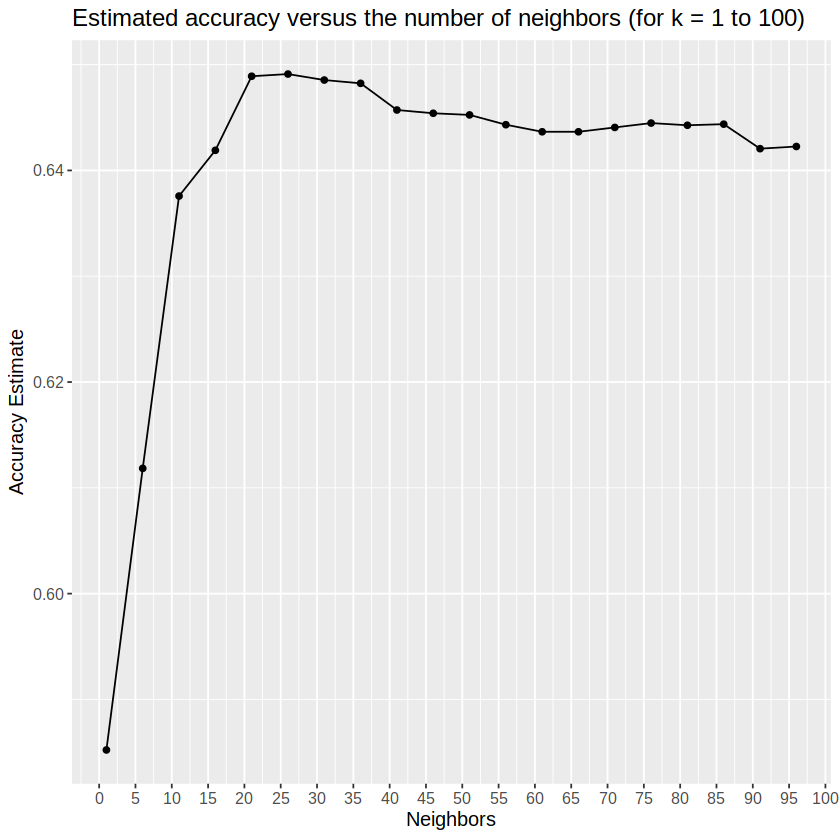

In [17]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() + 
                 labs(x = "Neighbors", y = "Accuracy Estimate") +
                 ggtitle("Estimated accuracy versus the number of neighbors (for k = 1 to 100)") +
                 theme(text = element_text(size = 12)) + 
                 scale_x_continuous(breaks = seq(0, 100, by = 5))

accuracy_vs_k

<font size= '2'> **Figure (ADD NUMBER):** A plot of depicting the estimated accuracy versus the number of neighbors from 0 to 100. Based on the graph, it looks like *k* = NUMBER provides the highest accuracy (ADD NUMBER) 

### 3) Predicting satisfaction in airplane_test 

In [ ]:
With our *k* value chosen, we can create `knn_spec_best_k` which will....

In [21]:
knn_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 26) |>
                   set_engine("kknn") |>
                   set_mode("classification")

knn_fit <- workflow() |>
        add_recipe(airplane_recipe) |>
        add_model(knn_spec_best_k) |>
        fit(data = airplane_train)

airplane_test_predictions <- predict(knn_fit, airplane_test) |>
                          bind_cols(airplane_test)

### 4) Evaluating the performance of the classifier

In [24]:
airplane_test_predictions |>
    metrics(truth = satisfaction, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6349599


### ADD TEXT

In [26]:
confusion_matrix <- airplane_test_predictions |>
                 conf_mat(truth = satisfaction, estimate = .pred_class)

confusion_matrix

                         Truth
Prediction                satisfied neutral or dissatisfied
  satisfied                     927                     497
  neutral or dissatisfied      1867                    3185

## ADD TEXT

## Discussion

It is important to note that there are only two classes: `neutral or dissatisfied` or `satisfied`. As such, our data set groups together passengers who are **either** neutral *or* dissatisfied. Thus, there is no way to know the proportion of passengers that are **either** dissatisfied or neutral within the `neutral or dissatisfied` class. 

That being said, this distinction between neutral or dissatisfied might not be as important given that the results of our analysis would likely be used to improve upon airline experience. Thus, when evaluating upon airline services, the goal would be to ensure that most passengers are overall satisfied such that they aren't just neutral or (more importantly) dissatisfied with their experience.



^Something to potentially add in discussion

- might also be useful to Note weaknesses and strengths of k-nearest neighbors in the context of trying to answer our question 

## References